/home/zhanghaoran/miniconda3/envs/CTR_GCN_ZHR/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(448, 6400)


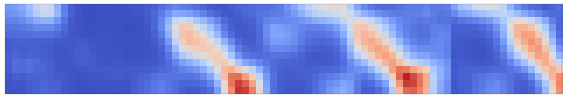

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math

# 尝试只用其中的一些骨骼点，比如引体向上不用腿部骨骼点特征
kkk = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/stu4_15_numpy(用我的模型跑的,时间幅度为64).npy')
print(kkk.shape)
# kkk = np.load('../../stu7_49_numpy(用我的模型跑的,时间幅度为64).npy')
# print(kkk.shape)
# kkk = kkk.reshape(1792,25,256)
# kkk = kkk.reshape(1792,6400)

zzz = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/stu7_34_numpy(用我的模型跑的,时间幅度为64).npy')
# ZZZ = ZZZ.reshape(576, 25, 256)
# ZZZ = np.delete(ZZZ, [0,1,2,3,4,5,6,7,8,9,10,11,19,20,21,22,23,24,    12, 13, 14, 16, 17, 18], axis=1)
# ZZZ = np.delete(ZZZ, [ 13, 14, 15, 17, 18,19], axis=1)
# ZZZ = ZZZ.reshape(576,6400)
# print(ZZZ.shape)

similarity_numpy = np.array([])
t1 = 36
t2 = 49
t3 = 0
t4 = 80
for i in range(t1,t2,1):
    for j in range(t3,t4):
        norm_1 = np.linalg.norm(kkk[i])
        norm_2 = np.linalg.norm(zzz[j])
        similarity_score = np.dot(kkk[i], zzz[j]) / (norm_1*norm_2)
        similarity_numpy = np.append(similarity_numpy, similarity_score.item())
# for i in range(len(similarity_numpy)):
#     similarity_numpy[i] = 1.0 - similarity_numpy[i]
similarity_numpy_2 = similarity_numpy.reshape(t2-t1,t4-t3)

new_shape = (20, 6400)
row_scale = new_shape[0] / similarity_numpy_2.shape[0]
col_scale = new_shape[1] / similarity_numpy_2.shape[1]
smoothed_array = np.kron(similarity_numpy_2, np.ones((int(row_scale), int(col_scale))))

aaa = []
# for i in range(5):
#     # similarity_numpy_3 = similarity_numpy_2[:,i*40:(i+1)*40]
#     similarity_numpy_3 = similarity_numpy_2[:,i*110:(i+1)*110]
#     aaa.append(similarity_numpy_3)
#     # result_matrix = np.vstack((aaa[0], aaa[1], aaa[2]))
fig = plt.figure(figsize=(150, 10),dpi=12)
# random_matrix = np.random.uniform(0, 0.2, size=(50, 200))
aaaa = np.vstack((similarity_numpy_2, similarity_numpy_2 , similarity_numpy_2, similarity_numpy_2, similarity_numpy_2))
plt.imshow(similarity_numpy_2, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
plt.xticks([])
plt.yticks([])
plt.savefig('../../YOLO/datasets/test/dudulu/heatmap_change_{}.png'.format(2), bbox_inches='tight', pad_inches=0)
# plt.title("Plot 2D array")
# plt.colorbar()
plt.show()

生成数据，但是纵坐标永远固定

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math
import csv

# 尝试只用其中的一些骨骼点，比如引体向上不用腿部骨骼点特征
kkk = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/stu4_15_numpy(用我的模型跑的,时间幅度为64).npy')
zzz = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/stu7_34_numpy(用我的模型跑的,时间幅度为64).npy')
print(kkk.shape)
print(zzz.shape)

list_kkk = ['0', '20', '36', '49', '64', '78', '95', '106', '123', '138', '150', '162', '177', '189', '205', '218', '233', '251', '265', '280', '290', '303', '321', '333', '347', '362', '375', '388', '405', '420', '433', '450', '460', '473']
list_zzz = ['15', '36', '50', '61', '72', '83', '96', '106', '117', '130', '140', '152', '162', '173', '182', '195', '206', '217', '226', '238', '247', '260', '271', '282', '295', '303', '315', '326', '336', '347', '358', '368', '380', '391', '402', '413', '423', '435', '446', '457', '468', '478', '489', '500', '510', '522', '532', '543', '555', '565', '576', '587', '598', '609', '620', '630', '642', '653', '663', '673', '685', '693', '706', '714', '728', '739', '750', '758', '770', '781', '792', '803', '813', '825', '835', '846', '857', '868', '878', '890']

c = 440
for index_pianduan in range(11):
    t3 = index_pianduan*80
    t4 = (index_pianduan+1)*80
    index_1 = index_2 = 0
    for ddd in range(len(list_zzz)):
       if int(list_zzz[ddd])>=t3:
          index_1 = ddd
          break
    for ddd in range(len(list_zzz)):
       if int(list_zzz[ddd])<t4:
          index_2 = ddd
       if int(list_zzz[ddd])>=t4:
          break
    
    print(index_1,index_2,list_zzz[index_1],list_zzz[index_2])
    # 此时index_1、index_2分别代表列表里在这个帧区间里的单次动作时间下标   
    # label = '0 0.5 0.5 0.61538 0.7619'
    label_list = []
    if index_1%2 == 1:
       label_list.append('0 '+str((int(list_zzz[index_1])-t3)/80/2)+' 0.5 '+str((int(list_zzz[index_1])-t3)/80)+' 1.0'+'\n')
    for dudulu in range(index_1,index_2):
       if dudulu%2 == 0:
          label_list.append('0 '+str((int(list_zzz[dudulu])-t3+int(list_zzz[dudulu+1])/2-int(list_zzz[dudulu])/2)/80)+' 0.5 '+str((int(list_zzz[dudulu+1])-int(list_zzz[dudulu]))/80)+' 1.0'+'\n')
    if index_2%2 == 0:
       label_list.append('0 '+str((t4/2-int(list_zzz[index_2])/2+int(list_zzz[index_2])-t3)/80)+' 0.5 '+str((t4-int(list_zzz[index_2]))/80)+' 1.0')

    # with open('../../目标检测txt文件YOLO(新的尝试)/{}.txt'.format(c), 'w') as file:
    #     file.write('0 '+str((int(list_zzz[index_1])-t3)/80/2)+' 0.5 '+str((int(list_zzz[index_1])-t3)/80)+' 1.0'+'\n')
    #     file.write('0 '+str((int(list_zzz[index_1])-t3)/80/2)+' 0.5 '+str((int(list_zzz[index_1])-t3)/80)+' 1.0')
    
    for index_biaozhunpipei in range(40):
        c += 1
        print(c)
        similarity_numpy = np.array([])

        t1 = int(list_zzz[index_biaozhunpipei*2])
        t2 = int(list_zzz[index_biaozhunpipei*2+1])

        for i in range(t1,t2,1):
            for j in range(t3,t4):
                norm_1 = np.linalg.norm(zzz[i])
                norm_2 = np.linalg.norm(zzz[j])
                similarity_score = np.dot(zzz[i], zzz[j]) / (norm_1*norm_2)
                similarity_numpy = np.append(similarity_numpy, similarity_score.item())
        similarity_numpy_2 = similarity_numpy.reshape(t2-t1,t4-t3)


        fig = plt.figure(figsize=(150, 10),dpi=12)

        # similarity_numpy_2[0:2,:] = similarity_numpy_2[2:4,:]

        plt.imshow(similarity_numpy_2, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
        plt.xticks([])
        plt.yticks([])
        plt.savefig('../../目标检测图片YOLO(新的尝试)/{}.png'.format(c), bbox_inches='tight', pad_inches=0)

        with open('../../目标检测txt文件YOLO(新的尝试)/{}.txt'.format(c), 'w') as file:
            for strItem in label_list:
               file.write(strItem)
        file.close()
# plt.title("Plot 2D array")
# plt.colorbar()
# plt.show()




list_1 = ['0', '20', '36', '49', '64', '78', '95', '106', '123', '138', '150', '162', '177', '189', '205', '218', '233', '251', '265', '280', '290', '303', '321', '333', '347', '362', '375', '388', '405', '420', '433', '450', '460', '473']
list_2 = ['15', '36', '50', '61', '72', '83', '96', '106', '117', '130', '140', '152', '162', '173', '182', '195', '206', '217', '226', '238', '247', '260', '271', '282', '295', '303', '315', '326', '336', '347', '358', '368', '380', '391', '402', '413', '423', '435', '446', '457', '468', '478', '489', '500', '510', '522', '532', '543', '555', '565', '576', '587', '598', '609', '620', '630', '642', '653', '663', '673', '685', '693', '706', '714', '728', '739', '750', '758', '770', '781', '792', '803', '813', '825', '835', '846', '857', '868', '878', '890']
# print(len(list_1))

(448, 6400)
(960, 6400)
0 4 15 72
1
2
3


/home/zhanghaoran/miniconda3/envs/CTR_GCN_ZHR/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
5 11 83 152
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
12 19 162 238
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
20 26 247 315
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
27 33 326 391
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
34 41 402 478
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
42 48 489 555
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258


In [4]:

import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math
import csv

# 尝试只用其中的一些骨骼点，比如引体向上不用腿部骨骼点特征
kkk = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/stu4_15_numpy(用我的模型跑的,时间幅度为64).npy')
zzz = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/stu7_34_numpy(用我的模型跑的,时间幅度为64).npy')

print(kkk.shape)
print(zzz.shape)

list_kkk = ['0', '20', '36', '49', '64', '78', '95', '106', '123', '138', '150', '162', '177', '189', '205', '218', '233', '251', '265', '280', '290', '303', '321', '333', '347', '362', '375', '388', '405', '420', '433', '450', '460', '473']
list_zzz = ['15', '36', '50', '61', '72', '83', '96', '106', '117', '130', '140', '152', '162', '173', '182', '195', '206', '217', '226', '238', '247', '260', '271', '282', '295', '303', '315', '326', '336', '347', '358', '368', '380', '391', '402', '413', '423', '435', '446', '457', '468', '478', '489', '500', '510', '522', '532', '543', '555', '565', '576', '587', '598', '609', '620', '630', '642', '653', '663', '673', '685', '693', '706', '714', '728', '739', '750', '758', '770', '781', '792', '803', '813', '825', '835', '846', '857', '868', '878', '890']

c = 0
for index_pianduan in range(11):
    t3 = index_pianduan*80
    t4 = (index_pianduan+1)*80
    index_1 = index_2 = 0
    for ddd in range(len(list_zzz)):
       if int(list_zzz[ddd])>=t3:
          index_1 = ddd
          break
    for ddd in range(len(list_zzz)):
       if int(list_zzz[ddd])<t4:
          index_2 = ddd
       if int(list_zzz[ddd])>=t4:
          break
    
    print(index_1,index_2,list_zzz[index_1],list_zzz[index_2])
    # 此时index_1、index_2分别代表列表里在这个帧区间里的单次动作时间下标   
    # label = '0 0.5 0.5 0.61538 0.7619'
    label_list = []
    if index_1%2 == 1:
       bili = (int(list_zzz[index_1])-t3)/(int(list_zzz[index_1])-int(list_zzz[index_1-1]))
       if bili>=0.25:
           label_list.append('0 '+str((int(list_zzz[index_1])-t3)/80/2)+' '+str(1-bili/2)+' '+str((int(list_zzz[index_1])-t3)/80)+' '+str(bili)+'\n')
    for dudulu in range(index_1,index_2):
       if dudulu%2 == 0:
          label_list.append('0 '+str((int(list_zzz[dudulu])-t3+int(list_zzz[dudulu+1])/2-int(list_zzz[dudulu])/2)/80)+' 0.5 '+str((int(list_zzz[dudulu+1])-int(list_zzz[dudulu]))/80)+' 1.0'+'\n')
    if index_2%2 == 0:
       bili = (t4-int(list_zzz[index_2]))/(int(list_zzz[index_2+1])-int(list_zzz[index_2]))
       label_list.append('0 '+str((t4/2-int(list_zzz[index_2])/2+int(list_zzz[index_2])-t3)/80)+' '+str(bili/2)+' '+str((t4-int(list_zzz[index_2]))/80)+' '+str(bili))

    # with open('../../目标检测txt文件YOLO(新的尝试)/{}.txt'.format(c), 'w') as file:
    #     file.write('0 '+str((int(list_zzz[index_1])-t3)/80/2)+' 0.5 '+str((int(list_zzz[index_1])-t3)/80)+' 1.0'+'\n')
    #     file.write('0 '+str((int(list_zzz[index_1])-t3)/80/2)+' 0.5 '+str((int(list_zzz[index_1])-t3)/80)+' 1.0')
    
    for index_biaozhunpipei in range(40):
        c += 1
        print(c)
        similarity_numpy = np.array([])

        t1 = int(list_zzz[index_biaozhunpipei*2])
        t2 = int(list_zzz[index_biaozhunpipei*2+1])

        for i in range(t1,t2,1):
            for j in range(t3,t4):
                norm_1 = np.linalg.norm(zzz[i])
                norm_2 = np.linalg.norm(zzz[j])
                similarity_score = np.dot(zzz[i], zzz[j]) / (norm_1*norm_2)
                similarity_numpy = np.append(similarity_numpy, similarity_score.item())
        similarity_numpy_2 = similarity_numpy.reshape(t2-t1,t4-t3)


        fig = plt.figure(figsize=(150, 10),dpi=12)

        # similarity_numpy_2[0:2,:] = similarity_numpy_2[2:4,:]

        plt.imshow(similarity_numpy_2, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
        plt.xticks([])
        plt.yticks([])
        plt.savefig('../../目标检测图片YOLO(新的尝试2)/{}.png'.format(c), bbox_inches='tight', pad_inches=0)

        with open('../../目标检测txt文件YOLO(新的尝试2)/{}.txt'.format(c), 'w') as file:
            for strItem in label_list:
               file.write(strItem)
        file.close()
# plt.title("Plot 2D array")
# plt.colorbar()
# plt.show()




list_1 = ['0', '20', '36', '49', '64', '78', '95', '106', '123', '138', '150', '162', '177', '189', '205', '218', '233', '251', '265', '280', '290', '303', '321', '333', '347', '362', '375', '388', '405', '420', '433', '450', '460', '473']
list_2 = ['15', '36', '50', '61', '72', '83', '96', '106', '117', '130', '140', '152', '162', '173', '182', '195', '206', '217', '226', '238', '247', '260', '271', '282', '295', '303', '315', '326', '336', '347', '358', '368', '380', '391', '402', '413', '423', '435', '446', '457', '468', '478', '489', '500', '510', '522', '532', '543', '555', '565', '576', '587', '598', '609', '620', '630', '642', '653', '663', '673', '685', '693', '706', '714', '728', '739', '750', '758', '770', '781', '792', '803', '813', '825', '835', '846', '857', '868', '878', '890']
# print(len(list_1))

(448, 6400)
(960, 6400)
0 4 15 72
1
2
3


/home/zhanghaoran/miniconda3/envs/CTR_GCN_ZHR/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
5 11 83 152
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
12 19 162 238
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
20 26 247 315
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
27 33 326 391
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
34 41 402 478
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
42 48 489 555
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258


(1152, 6400)


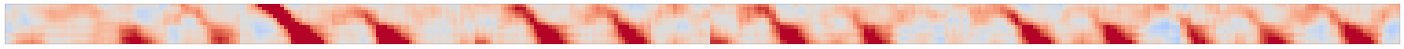

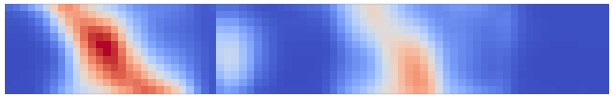

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import ctrgcn_zhr
import torch
import math

kkk = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/pose_action_feature/stu2_41_numpy(用我的模型跑的,时间幅度为64).npy')
zzz = np.load('../../../../../../data/ssd1/zhanghaoran/zhr/完整的特征向量/stu6_53_numpy(用我的模型跑的,时间幅度为64).npy')
print(zzz.shape)

kkk_benchmark = np.load('../../单个视频的64帧特征10/stu2_41_numpy(benchmark模型跑的,时间幅度为64).npy')
zzz_benchmark = np.load('../../单个视频的64帧特征10/stu7_34_numpy(benchmark模型跑的,时间幅度为64).npy')

similarity_numpy = np.array([])
t1 = 72
t2 = 83
t3 = 0
t4 = 380
for i in range(t1,t2,1):
    for j in range(t3,t4):
        norm_1 = np.linalg.norm(zzz_benchmark[i])
        norm_2 = np.linalg.norm(zzz_benchmark[j])
        similarity_score = np.dot(zzz_benchmark[i], zzz_benchmark[j]) / (norm_1*norm_2)
        similarity_numpy = np.append(similarity_numpy, similarity_score.item())
similarity_numpy_2 = similarity_numpy.reshape(t2-t1,t4-t3)


fig = plt.figure(figsize=(150, 10),dpi=12)

plt.imshow(similarity_numpy_2, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
plt.xticks([])
plt.yticks([])
# plt.savefig('../../YOLO/datasets/test/dudulu/heatmap_change_{}.png'.format(2), bbox_inches='tight', pad_inches=0)
plt.show()

similarity_numpy = np.array([])
t1 = 988
t2 = 1000
t3 = 100
t4 = 180
for i in range(t1,t2,1):
    for j in range(t3,t4):
        norm_1 = np.linalg.norm(zzz[i])
        norm_2 = np.linalg.norm(zzz[j])
        similarity_score = np.dot(zzz[i], zzz[j]) / (norm_1*norm_2)
        similarity_numpy = np.append(similarity_numpy, similarity_score.item())
similarity_numpy_2 = similarity_numpy.reshape(t2-t1,t4-t3)


fig = plt.figure(figsize=(150, 10),dpi=12)

plt.imshow(similarity_numpy_2, cmap='coolwarm', interpolation='nearest',vmin=0,vmax=0.7)
plt.xticks([])
plt.yticks([])
# plt.savefig('../../YOLO/datasets/test/dudulu/heatmap_change_{}.png'.format(2), bbox_inches='tight', pad_inches=0)
plt.show()